In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load and inspect data

In [2]:
print("Loading Ghana crop production data (2000-2012)...")
df = pd.read_csv(r"C:\Users\BORASA\Downloads\Crop Production metric tonnes MOFA 2013.csv")
print(f"Data loaded successfully with {df.shape[0]} crops and {df.shape[1]-1} years\n")

Loading Ghana crop production data (2000-2012)...
Data loaded successfully with 11 crops and 13 years



# Data cleaning

In [3]:
print("Cleaning data...")
df.columns = ['Crop'] + [col.strip() for col in df.columns[1:]]
df['Crop'] = df['Crop'].str.strip()
df = df.replace(0, np.nan)  # Handle zeros as missing values
print("Data cleaning complete.\n")

Cleaning data...
Data cleaning complete.



# Reshape data for analysis

In [4]:
print("Preparing data for analysis...")
melted_df = df.melt(id_vars='Crop', var_name='Year', value_name='Production')
melted_df['Year'] = melted_df['Year'].astype(int)
print("Data transformation complete.\n")

Preparing data for analysis...
Data transformation complete.



# Analysis 1: Top crops in 2012

In [5]:
latest_year = melted_df[melted_df['Year'] == 2012]
top_crops = latest_year.sort_values('Production', ascending=False).head(5)
print("Top 5 crops in 2012:")
print(top_crops[['Crop', 'Production']])
print("\n")

Top 5 crops in 2012:
         Crop  Production
136   Cassava    14547300
138       Yam     6638900
139  Plantain     3556500
141  Oil Palm     2196100
132     Maize     1949900




# Analysis 2: Growth trends (2000-2012)

In [6]:
pivot_df = melted_df.pivot_table(index='Crop', columns='Year', values='Production')
pivot_df['Growth'] = (pivot_df[2012] - pivot_df[2000]) / pivot_df[2000] * 100
growth_df = pivot_df.sort_values('Growth', ascending=False)[[2000, 2012, 'Growth']]
print("Crop growth (2000-2012):")
print(growth_df.round(1))
print("\n")

Crop growth (2000-2012):
Year             2000        2012  Growth
Crop                                     
Beans         63300.0    223200.0   252.6
Groundnuts   208600.0    475100.0   127.8
Paddy Rice   214600.0    481100.0   124.2
Oil Palm    1066400.0   2196100.0   105.9
Yam         3362900.0   6638900.0    97.4
Maize       1012700.0   1949900.0    92.5
Plantain    1932500.0   3556500.0    84.0
Cassava     8106800.0  14547300.0    79.4
Millet       169400.0    179700.0     6.1
Sorghum      279800.0    280000.0     0.1
Cocoyam     1625100.0   1270300.0   -21.8




# Analysis 3: The 2007 crisis

In [7]:
crisis_df = pivot_df[[2006, 2007, 2008]]
crisis_df['Decline'] = (crisis_df[2007] - crisis_df[2006]) / crisis_df[2006] * 100
crisis_analysis = crisis_df[crisis_df['Decline'] < 0].sort_values('Decline')
print("Crops most affected in 2007 crisis:")
print(crisis_analysis[['Decline']].round(1))
print("\n")

Crops most affected in 2007 crisis:
Year        Decline
Crop               
Sorghum       -50.9
Groundnuts    -42.0
Millet        -31.5
Beans         -28.8
Paddy Rice    -25.9
Oil Palm       -3.1




# Analysis 4: Cassava's accelerating growth

In [8]:
cassava = pivot_df.loc['Cassava']
acceleration = (cassava[2012]-cassava[2011]) - (cassava[2011]-cassava[2010])
print(f"Cassava's growth acceleration: {acceleration:,.0f} tonnes/year\n")

Cassava's growth acceleration: -430,400 tonnes/year



# Data Visualization

# Plot 1: Top crops in 2012

<Figure size 1400x1000 with 0 Axes>

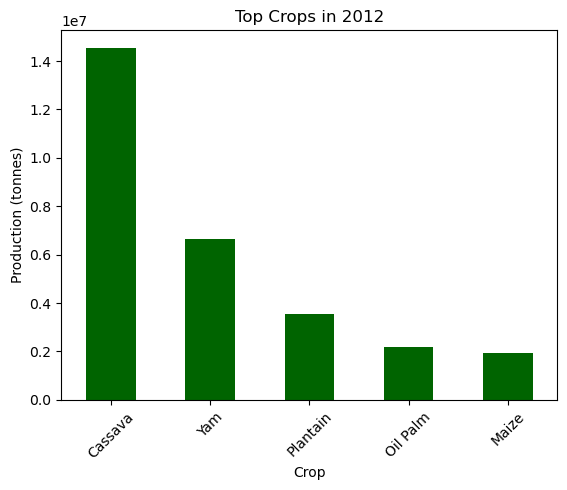

In [9]:
plt.figure(figsize=(14, 10))
top_crops.plot.bar(x='Crop', y='Production', legend=False, color='darkgreen')
plt.title('Top Crops in 2012')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=45);

# Plot 2: Growth champions

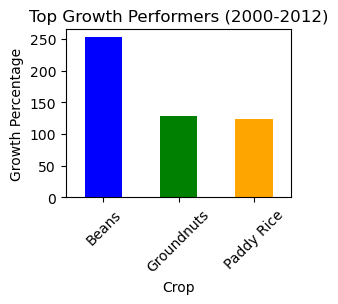

In [10]:
plt.subplot(2, 2, 2)
growth_champs = growth_df.head(3)
growth_champs['Growth'].plot.bar(color=['blue','green','orange'])
plt.title('Top Growth Performers (2000-2012)')
plt.ylabel('Growth Percentage')
plt.xticks(ticks=range(3), labels=growth_champs.index, rotation=45);

# Plot 3: Crisis in 2007

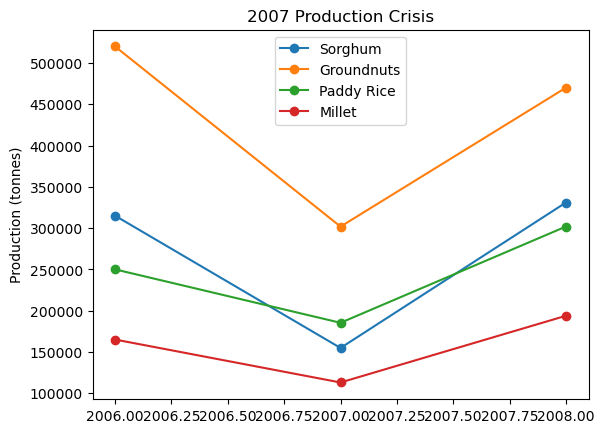

In [11]:
#plt.subplot(2, 2, 3)
crisis_crops = ['Sorghum', 'Groundnuts', 'Paddy Rice', 'Millet']
for crop in crisis_crops:
    plt.plot([2006,2007,2008], pivot_df.loc[crop][[2006,2007,2008]], label=crop, marker='o')
plt.title('2007 Production Crisis')
plt.ylabel('Production (tonnes)')
plt.legend()

# Plot 4: Cassava dominance

Visualizations saved to crop_production_plots.png


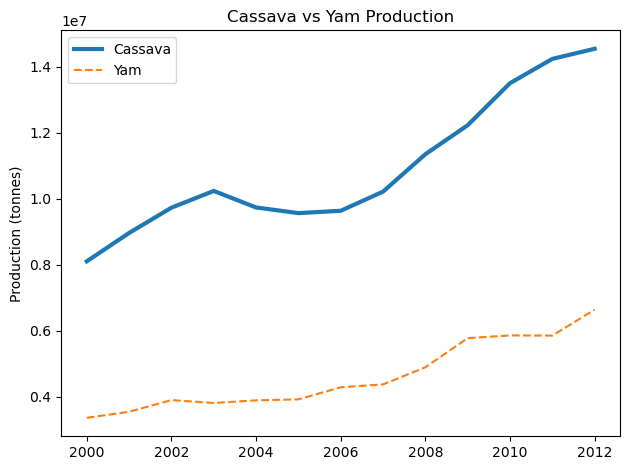

In [12]:
#plt.subplot(2, 2, 4)
years = range(2000, 2013)
plt.plot(years, pivot_df.loc['Cassava'][years], label='Cassava', linewidth=3)
plt.plot(years, pivot_df.loc['Yam'][years], label='Yam', linestyle='--')
plt.title('Cassava vs Yam Production')
plt.ylabel('Production (tonnes)')
plt.legend()

plt.tight_layout()
plt.savefig('crop_production_plots.png')
print("Visualizations saved to crop_production_plots.png")

# Storytelling narrative

In [13]:
print("\n" + "="*80)
print("GHANA'S CROP PRODUCTION STORY (2000-2012)")
print("="*80)
print("\nCHAPTER 1: CASSAVA DOMINANCE")
print("Cassava emerged as Ghana's agricultural backbone, producing 14.5 million tonnes in 2012 -")
print("more than yam and plantain combined. Its 79% growth since 2000 demonstrates remarkable consistency.")

print("\nCHAPTER 2: YAM REVOLUTION")
print("Yam production surged 97% over 12 years, the highest growth rate of any crop.")
print("This staple food became crucial for food security and farmer incomes.")

print("\nCHAPTER 3: THE FORGOTTEN CROPS")
print("While most crops expanded, cocoyam declined by 22%. Sorghum and millet never")
print("fully recovered from the 2007 floods that devastated northern Ghana.")

print("\nCHAPTER 4: THE 2007 CRISIS")
print("Severe flooding caused production crashes: sorghum (-51%), groundnuts (-42%),")
print("and paddy rice (-26%). This highlighted climate vulnerability in agriculture.")

print("\nCHAPTER 5: FUTURE TRENDS")
print("Cassava shows accelerating growth patterns, suggesting it will maintain dominance.")
print(f"Its annual production increases grew by {acceleration:,.0f} tonnes from 2011-2012 alone!")

print("\nCONCLUSION")
print("Ghana's agricultural transformation focused on starchy staples while traditional")
print("crops declined. Future policies should balance productivity with crop diversity")
print("and climate resilience to ensure sustainable food systems.")


GHANA'S CROP PRODUCTION STORY (2000-2012)

CHAPTER 1: CASSAVA DOMINANCE
Cassava emerged as Ghana's agricultural backbone, producing 14.5 million tonnes in 2012 -
more than yam and plantain combined. Its 79% growth since 2000 demonstrates remarkable consistency.

CHAPTER 2: YAM REVOLUTION
Yam production surged 97% over 12 years, the highest growth rate of any crop.
This staple food became crucial for food security and farmer incomes.

CHAPTER 3: THE FORGOTTEN CROPS
While most crops expanded, cocoyam declined by 22%. Sorghum and millet never
fully recovered from the 2007 floods that devastated northern Ghana.

CHAPTER 4: THE 2007 CRISIS
Severe flooding caused production crashes: sorghum (-51%), groundnuts (-42%),
and paddy rice (-26%). This highlighted climate vulnerability in agriculture.

CHAPTER 5: FUTURE TRENDS
Cassava shows accelerating growth patterns, suggesting it will maintain dominance.
Its annual production increases grew by -430,400 tonnes from 2011-2012 alone!

CONCLUSION
G